In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import gmaps
import gmaps.datasets
import geopandas as gpd
import fiona
import descartes

In [2]:
#import csv as a dataframe
#print dataframe

original_path = "income_data.csv"
income_data = pd.read_csv(original_path, encoding="utf-8")
income_data.head()

,timeframe,ward2012,ward2012_nf,start_date,end_date,PctPoorPersons,PctPoorChildren,PctPoorElderly,AvgFamilyIncAdj,PctPoorPersons_m,PctPoorChildren_m,PctPoorElderly_m,AvgFamilyIncAdj_m,PctChgAvgFamilyIncAdj,Tanf_client,Fs_client
0,2012-16,Ward 1,1,1-Jan-12,31-Dec-16,14,25,19,134463,1.5,4.4,3.8,11508,X,X,X
1,2012-16,Ward 2,2,1-Jan-12,31-Dec-16,14,5.5,13,225994,1.4,5.8,4.1,24703,X,X,X
2,2012-16,Ward 3,3,1-Jan-12,31-Dec-16,9.4,2.8,3.9,281764,1.2,1.8,1.5,18626,X,X,X
3,2012-16,Ward 4,4,1-Jan-12,31-Dec-16,11,13,12,140497,1.3,2.3,2,8254,X,X,X
4,2012-16,Ward 5,5,1-Jan-12,31-Dec-16,18,18,17,97593,1.4,2.7,2.6,6156,X,X,X


In [3]:
income_clean = income_data.iloc[[24,25,26,27,28,29,30,31],[1,3,4,13]]

income_clean = income_clean.rename(columns={"timeframe":"Timeframe",
                                            "start_date": "Start Date",
                                            "end_date": "End Date",
                                            "ward2012": "Ward", 
                                            "PctChgAvgFamilyIncAdj": "% Change Avg. Family Income (Adjusted)"})
income_clean


# income_clean["% Change Avg. Family Income (Adjusted)"] = income_clean["% Change Avg. Family Income (Adjusted)"].map("{:,.2f}%".format)


,Ward,Start Date,End Date,% Change Avg. Family Income (Adjusted)
24,Ward 1,1-Jan-00,31-Dec-16,61
25,Ward 2,1-Jan-00,31-Dec-16,6.9
26,Ward 3,1-Jan-00,31-Dec-16,4.7
27,Ward 4,1-Jan-00,31-Dec-16,20
28,Ward 5,1-Jan-00,31-Dec-16,24
29,Ward 6,1-Jan-00,31-Dec-16,71
30,Ward 7,1-Jan-00,31-Dec-16,-3.9
31,Ward 8,1-Jan-00,31-Dec-16,1.8


In [4]:
income_clean.dtypes

Ward                                      object
Start Date                                object
End Date                                  object
% Change Avg. Family Income (Adjusted)    object
dtype: object

In [5]:
#import csv as a dataframe
#print dataframe

original_path = "housing_data.csv"
housing_data = pd.read_csv(original_path, encoding="utf-8")
housing_data.head()

,timeframe,ward2012,NumOccupiedHsgUnits,NumOccupiedHsgUnits_m,ward2012_nf,start_date,end_date,PctSameHouse5YearsAgo,PctVacantHsgUnitsForRent,PctOwnerOccupiedHsgUnits,...,PctSubprimeConvOrigHomePur,forecl_ssl_1Kpcl_sf_condo,forecl_ssl_sf_condo,trustee_ssl_1Kpcl_sf_condo,trustee_ssl_sf_condo,PctAnnChgRMPriceSf_1yr,PctAnnChgRMPriceSf_5yr,PctAnnChgRMPriceSf_10yr,indc,PctChgPrc
0,2000,Ward 1,30536,.,1,1-Jan-00,31-Dec-00,42,4.1,29,...,X,X,X,X,X,X,X,X,1,NaN
1,2000,Ward 2,34001,.,2,1-Jan-00,31-Dec-00,30,3.5,32,...,X,X,X,X,X,X,X,X,1,NaN
2,2000,Ward 3,37886,.,3,1-Jan-00,31-Dec-00,44,2.2,50,...,X,X,X,X,X,X,X,X,1,NaN
3,2000,Ward 4,29195,.,4,1-Jan-00,31-Dec-00,62,6.7,61,...,X,X,X,X,X,X,X,X,1,NaN
4,2000,Ward 5,28110,.,5,1-Jan-00,31-Dec-00,58,8.9,49,...,X,X,X,X,X,X,X,X,1,NaN


In [6]:
housing_clean = housing_data.iloc[[8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],[0,1,5,6,12]]
housing_clean = housing_clean.rename(columns={"timeframe":"Timeframe",
                                              "ward2012": "Ward", 
                                              "start_date": "Start Date", 
                                              "end_date": "End Date", 
                                              "mprice_sf": "Housing Prices"})

housing_clean

,Timeframe,Ward,Start Date,End Date,Housing Prices
8,2000,Ward 1,1-Jan-00,31-Dec-00,154500
9,2000,Ward 2,1-Jan-00,31-Dec-00,500000
10,2000,Ward 3,1-Jan-00,31-Dec-00,455000
11,2000,Ward 4,1-Jan-00,31-Dec-00,156750
12,2000,Ward 5,1-Jan-00,31-Dec-00,124200
13,2000,Ward 6,1-Jan-00,31-Dec-00,159900
14,2000,Ward 7,1-Jan-00,31-Dec-00,93133
15,2000,Ward 8,1-Jan-00,31-Dec-00,96175
16,2016,Ward 1,1-Jan-16,31-Dec-16,801300
17,2016,Ward 2,1-Jan-16,31-Dec-16,1300000


In [7]:
pct_change_df = housing_data.iloc[[8,9,10,11,12,13,14,15],[1,25]]
pct_change_df = pct_change_df.rename(columns={"ward2012": "Ward",  
                                              "PctChgPrc": "% Change Housing Prices"})
pct_change_df["% Change Housing Prices"] = pct_change_df["% Change Housing Prices"].map("{:,.2f}%".format)

pct_change_df.reset_index()
pct_change_df

,Ward,% Change Housing Prices
8,Ward 1,418.64%
9,Ward 2,160.00%
10,Ward 3,157.69%
11,Ward 4,314.04%
12,Ward 5,338.81%
13,Ward 6,375.23%
14,Ward 7,221.31%
15,Ward 8,200.08%


In [8]:
merged_df = pd.merge(income_clean, pct_change_df, on="Ward")
merged_df

,Ward,Start Date,End Date,% Change Avg. Family Income (Adjusted),% Change Housing Prices
0,Ward 1,1-Jan-00,31-Dec-16,61,418.64%
1,Ward 2,1-Jan-00,31-Dec-16,6.9,160.00%
2,Ward 3,1-Jan-00,31-Dec-16,4.7,157.69%
3,Ward 4,1-Jan-00,31-Dec-16,20,314.04%
4,Ward 5,1-Jan-00,31-Dec-16,24,338.81%
5,Ward 6,1-Jan-00,31-Dec-16,71,375.23%
6,Ward 7,1-Jan-00,31-Dec-16,-3.9,221.31%
7,Ward 8,1-Jan-00,31-Dec-16,1.8,200.08%


In [9]:
merged_df = merged_df[["Ward", "% Change Avg. Family Income (Adjusted)", "% Change Housing Prices"]]
merged_df.head()

,Ward,% Change Avg. Family Income (Adjusted),% Change Housing Prices
0,Ward 1,61,418.64%
1,Ward 2,6.9,160.00%
2,Ward 3,4.7,157.69%
3,Ward 4,20,314.04%
4,Ward 5,24,338.81%


In [10]:
# set the filepath and load in a shapefile
fp = "Ward_from_2012/Ward_from_2012.shp"

map_df = gpd.read_file(fp)

# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

#pull only the columns we need
map_df = map_df[['NAME', 'geometry']]
map_df

,NAME,geometry
0,Ward 8,"POLYGON ((-76.97229 38.87286, -76.97223 38.872..."
1,Ward 6,"POLYGON ((-77.01790 38.91410, -77.01786 38.914..."
2,Ward 7,"POLYGON ((-76.94186 38.91854, -76.90915 38.892..."
3,Ward 2,"POLYGON ((-77.04946 38.91999, -77.04919 38.919..."
4,Ward 1,"POLYGON ((-77.03523 38.93743, -77.03480 38.937..."
5,Ward 5,"POLYGON ((-76.99144 38.95730, -76.94186 38.918..."
6,Ward 3,"POLYGON ((-77.05808 38.95676, -77.05807 38.956..."
7,Ward 4,"POLYGON ((-77.04097 38.99597, -76.99144 38.957..."


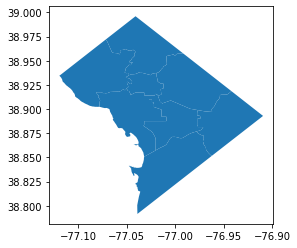

In [11]:
map_df.plot()

In [12]:
#  join the geodataframe with the cleaned up csv dataframe

merged = map_df.set_index("NAME").join(merged_df.set_index("Ward"))
merged

,geometry,% Change Avg. Family Income (Adjusted),% Change Housing Prices
NAME,,,
Ward 8,"POLYGON ((-76.97229 38.87286, -76.97223 38.872...",1.8,200.08%
Ward 6,"POLYGON ((-77.01790 38.91410, -77.01786 38.914...",71,375.23%
Ward 7,"POLYGON ((-76.94186 38.91854, -76.90915 38.892...",-3.9,221.31%
Ward 2,"POLYGON ((-77.04946 38.91999, -77.04919 38.919...",6.9,160.00%
Ward 1,"POLYGON ((-77.03523 38.93743, -77.03480 38.937...",61,418.64%
Ward 5,"POLYGON ((-76.99144 38.95730, -76.94186 38.918...",24,338.81%
Ward 3,"POLYGON ((-77.05808 38.95676, -77.05807 38.956...",4.7,157.69%
Ward 4,"POLYGON ((-77.04097 38.99597, -76.99144 38.957...",20,314.04%


In [16]:
var_1 = '% Change Avg. Family Income (Adjusted)'
var_2 = '% Change Housing Prices'

vmin, vmax = 0, 20

fig, ax = plt.subplots(1, figsize=(10,6))

merged.plot(column=var_1, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

    
ax.axis('off')
ax.set_title('Average Family Income (% change 2000-2016)', fontdict={'fontsize': '25', 'fontweight': '3'})
ax.annotate('Source: Open Data DC', xy=(0.1,.08),
           xycoords='figure fraction',horizontalalignment='left',
           verticalalignment='top',fontsize=12,color='Gray')
ax = merged.plot

ax = merged.apply(lambda x: ax.annotate(s=merged.index, xy=x.geometry.centroid.coords[0])



SyntaxError: unexpected EOF while parsing (<ipython-input-16-1291dcaa5c58>, line 19)

In [ ]:
# sm = plt.cm.ScalarMappable(cmap='Reds',norm=plt.Normalize(vmin=vmin,vmax=vmax))
# sm._A = []
# cbar = fig.colorbar(sm)

In [ ]:
vmin, vmax = 0, 20

fig, ax = plt.subplots(1, figsize=(10,6))

merged.plot(column=var_2, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('% Change Housing Prices', fontdict={'fontsize': '25', 'fontweight': '3'})
ax.annotate('Source: Open Data DC', xy=(0.1,.08),
           xycoords='figure fraction',horizontalalignment='left',
           verticalalignment='top',fontsize=12,color='Gray')

sm = plt.cm.ScalarMappable(cmap='Blues',norm=plt.Normalize(vmin=vmin,vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)